# Project 1 - DSCI 614
## Jeffery Boczkaja

### Problem 1 - "Search Google using the keywords "Winter snowstorm".

In [1]:
from googlesearch import search
import pandas as pd

query = "Winter snowstorm"
result = list(search(query, num_results=100, sleep_interval=5, lang="en",advanced=True))

### Problem 2 -Extract the last 100 results.

In [2]:
print(result)

[SearchResult(url=https://scied.ucar.edu/learning-zone/storms/winter-storms, title=Winter Storms - UCAR Center for Science Education, description=Snowstorms are one type of winter storm. Blizzards are snowstorms with high winds, and lake effect storms are snowstorms that form near the Great Lakes.), SearchResult(url=https://en.wikipedia.org/wiki/Winter_storm, title=Winter storm, description=A winter storm is an event in which wind coincides with varieties of precipitation that only occur at freezing temperatures, such as snow, mixed snow and ...), SearchResult(url=https://www.nssl.noaa.gov/education/svrwx101/winter/types/, title=Severe Weather 101: Winter Weather Types, description=A winter storm is a combination of heavy snow, blowing snow and/or dangerous wind chills. A winter storm is life-threatening. Blizzards are dangerous winter ...), SearchResult(url=https://www.weather.gov/safety/winter-during, title=What To Do If You're Caught in a Winter Storm, description=When caught in a w

### Problem 3 - Save the results in a data frame with columns of the URL, title, and description.

In [3]:
results = [str(item) for item in result]

In [4]:
data =[]
for result in results:
    url = result.split("url=")[1].split(",")[0]
    title = result.split("title=")[1].split(",")[0]
    description = result.split("description=")[1].split(")")[0]
    
    result_dict = {
        'URL': url,
        'Title': title,
        'Description': description
    }
    
    data.append(result_dict)

df = pd.DataFrame(data)

print(df)

                                                   URL  \
0    https://scied.ucar.edu/learning-zone/storms/wi...   
1           https://en.wikipedia.org/wiki/Winter_storm   
2    https://www.nssl.noaa.gov/education/svrwx101/w...   
3         https://www.weather.gov/safety/winter-during   
4                    https://weather.com/storms/winter   
..                                                 ...   
96   https://dailyillini.com/news-stories/campus-li...   
97   https://milwaukeecourieronline.com/index.php/2...   
98   https://thebrownandwhite.com/2018/03/07/snowst...   
99   https://www.wunderground.com/article/storms/wi...   
100      https://espo.nasa.gov/impacts/content/IMPACTS   

                                                 Title  \
0    Winter Storms - UCAR Center for Science Education   
1                                         Winter storm   
2             Severe Weather 101: Winter Weather Types   
3        What To Do If You're Caught in a Winter Storm   
4            

### Problem 4 - Create a word cloud for the text of these descriptions.

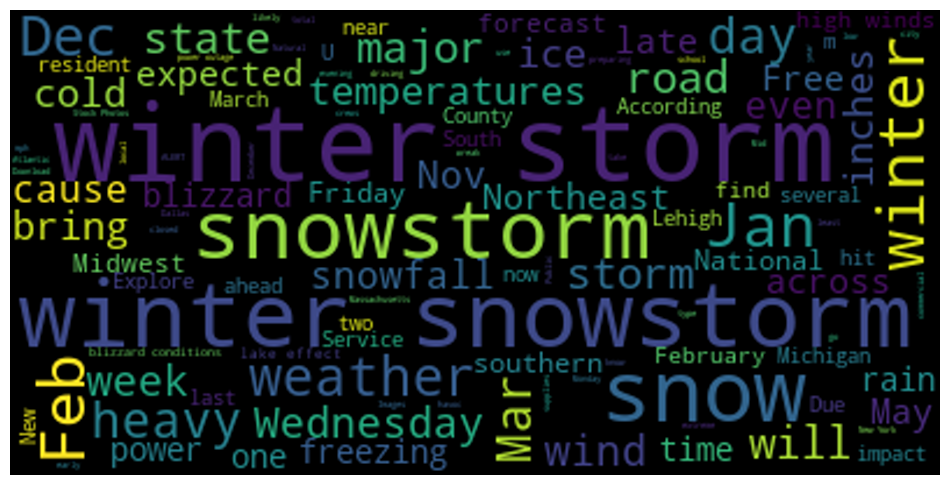

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

description = ' '.join(df['Description'])
wordcloud = WordCloud().generate(description)

plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation = 'spline16')
plt.axis("off")
plt.show()

### Problem 5 - Perform the named entity recognition on the descriptions.

In [6]:
import spacy
import en_core_web_sm 

nlp = en_core_web_sm.load()

doc = nlp(description)

if doc.ents:
    for ent in doc.ents:
        print(f'{ent.text} : {ent.label_} - {spacy.explain(ent.label_)}')
    else:
        print(f'No luck with name entities!')

one : CARDINAL - Numerals that do not fall under another type
winter : DATE - Absolute or relative dates or periods
the Great Lakes : FAC - Buildings, airports, highways, bridges, etc.
winter : DATE - Absolute or relative dates or periods
Winter Storm Olive : WORK_OF_ART - Titles of books, songs, etc.
Michigan : GPE - Countries, cities, states
Ann Arbor : GPE - Countries, cities, states
Blizzard : PERSON - People, including fictional
35 mph : QUANTITY - Measurements, as of weight or distance
less than a quarter : DATE - Absolute or relative dates or periods
3 hours : TIME - Times smaller than a day
Winter : DATE - Absolute or relative dates or periods
Winter : DATE - Absolute or relative dates or periods
Nov 29, 2022 : DATE - Absolute or relative dates or periods
Dec 19, 2022 : DATE - Absolute or relative dates or periods
the days ahead of Christmas : DATE - Absolute or relative dates or periods
At least 4 inches : QUANTITY - Measurements, as of weight or distance
March 9-10, 2023 : DA